# Assessing tidal fluctuations in ROMS 33 m model

In [3]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
from ocean_c_lab_tools import *
import scipy
#import xrscipy.signal as dsp

In [ ]:


from datetime import datetime, timedelta

def seconds2date(seconds_since_2000):
    # Define what is zero in datetime space"
    zero_date = datetime(2000, 1, 1, 0, 0, 0)
    
    # Add the "ocean time" to the "zero date" in datetime space. "np.vectorize is so that 'timedelta' plays nice with xarry and Numpy array formats
    real_date = zero_date + np.vectorize(timedelta)(seconds=seconds_since_2000)

    return real_date

def ocean_time2date(ocean_time): #apply seconds_since_2000 function to ocean_time, converting into datetime space
    date_array = xr.apply_ufunc(seconds2date,ocean_time) 
    return date_array

def ocean_data2date(datafile): # load a file, isolate ocean_time, and then convert ocean_time to datetime space
    data = xr.open_dataset(datafile)
    ocean_time = data['ocean_time']
    date_array = xr.apply_ufunc(seconds2date,ocean_time)
    return date_array


In [4]:
x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland4_tidelrelease/Iceland4_zerodye_rst.201206[1-2][1-2]*.nc', combine='nested', concat_dim=["time"])
#x=xr.open_mfdataset('/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*.nc', combine='nested', concat_dim=["time"])

#/expanse/lustre/projects/cos100/slevy1/icelandBGCdata/*

/home/uheede/.conda/envs/xarray_new/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


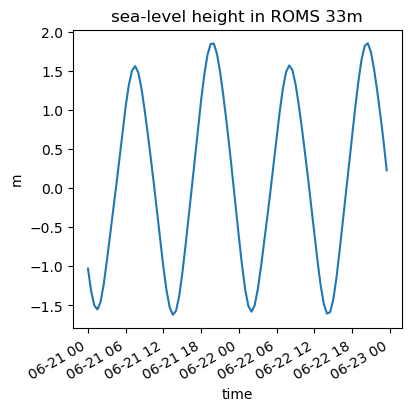

In [13]:
zeta=x['zeta'].sel(xi_rho=800).sel(eta_rho=450).squeeze()
#usurf=x['u'].sel(s_rho=99).sel(xi_u=1120).sel(eta_rho=slice(550,660)).mean('eta_rho').squeeze()
plot_time=ocean_time2date(x['ocean_time'].load())
#plt.plot(x.ocean_time.load(),zeta)
fig, axs = plt.subplots(1, 1, figsize=(4, 4), layout='constrained')
axs.plot(plot_time,zeta)
axs.set_xlabel('time')
axs.set_ylabel('m')
axs.set_title('sea-level height in ROMS 33m')
for label in axs.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')